# Chicago Car Crash Analysis

## Importing Packages

In [351]:
# Importing packages needed for this notebook

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [352]:
# Reading the data in

df_crashes = pd.read_csv("data/Traffic_Crashes_-_Crashes_20231109.csv")
df_vehicles = pd.read_csv("data/Traffic_Crashes_-_Vehicles_20231109.csv")
df_people = pd.read_csv("data/Traffic_Crashes_-_People_20231109.csv")

D:\Documents\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
D:\Documents\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (20,24,25,26,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [353]:
# Dropping columns

columns_to_drop_crashes = ['RD_NO', 'CRASH_DATE_EST_I', 'LANE_CNT', 'REPORT_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DATE_POLICE_NOTIFIED',
                           'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I',
                           'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
                           'INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE', 'LOCATION'
                           ]

columns_to_drop_vehicles = ['RD_NO', 'CRASH_DATE', 'CRASH_UNIT_ID', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE', 'MODEL', 'VEHICLE_YEAR',
                            'VEHICLE_DEFECT','VEHICLE_USE', 'TRAVEL_DIRECTION', 'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY', 'TOWED_TO',
                            'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I',
                            'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',  'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO', 'COMMERCIAL_SRC',
                            'GVWR', 'CARRIER_NAME', 'CARRIER_STATE', 'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME','UN_NO', 'HAZMAT_PRESENT_I',
                            'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO', 'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I', 'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO',
                            'WIDE_LOAD_I', 'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH', 'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG', 'CARGO_BODY_TYPE',
                            'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I', 'MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS'
                            ]

columns_to_drop_people = ['RD_NO', 'CRASH_DATE', 'VEHICLE_ID', 'PERSON_ID', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'EJECTION',
                          'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 'BAC_RESULT VALUE', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'CELL_PHONE_USE', 'INJURY_CLASSIFICATION'
                          ]

df_crashes = df_crashes.drop(columns_to_drop_crashes, axis=1)
df_vehicles = df_vehicles.drop(columns_to_drop_vehicles, axis=1)
df_people = df_people.drop(columns_to_drop_people, axis=1)

## Creating a Master DataFrame

In [354]:
master_df = pd.merge(df_crashes, pd.merge(df_vehicles, df_people, on="CRASH_RECORD_ID"), on="CRASH_RECORD_ID")

## Info and column names of each table

In [288]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3594423 entries, 0 to 3594422
Data columns (total 34 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CRASH_RECORD_ID          object 
 1   CRASH_DATE               object 
 2   POSTED_SPEED_LIMIT       int64  
 3   TRAFFIC_CONTROL_DEVICE   object 
 4   DEVICE_CONDITION         object 
 5   WEATHER_CONDITION        object 
 6   LIGHTING_CONDITION       object 
 7   FIRST_CRASH_TYPE         object 
 8   TRAFFICWAY_TYPE          object 
 9   ALIGNMENT                object 
 10  ROADWAY_SURFACE_COND     object 
 11  ROAD_DEFECT              object 
 12  CRASH_TYPE               object 
 13  DAMAGE                   object 
 14  PRIM_CONTRIBUTORY_CAUSE  object 
 15  NUM_UNITS                int64  
 16  MOST_SEVERE_INJURY       object 
 17  INJURIES_TOTAL           float64
 18  CRASH_HOUR               int64  
 19  CRASH_DAY_OF_WEEK        int64  
 20  CRASH_MONTH              int64  
 21  LIC_PLAT

## Takeaway

- 3,594,423 observations
- 36 combined columns
- 987 MB combined memory file

## Data Cleaning

In [355]:
# Filtering from 2020 and on

master_df['CRASH_DATE'] = pd.to_datetime(master_df['CRASH_DATE'])
master_df['YEAR'] = master_df['CRASH_DATE'].dt.year
master_df = master_df.loc[master_df['INJURIES_TOTAL'] > 0]
master_df = master_df[
    (master_df["YEAR"] >= 2020) &
    ((master_df["VEHICLE_TYPE"] == "PASSENGER") |
     (master_df["VEHICLE_TYPE"] == "SPORT UTILITY VEHICLE (SUV)") |
     (master_df["VEHICLE_TYPE"] == "VAN/MINI-VAN"))
]
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305598 entries, 14 to 1858292
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CRASH_RECORD_ID          305598 non-null  object        
 1   CRASH_DATE               305598 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT       305598 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE   305598 non-null  object        
 4   DEVICE_CONDITION         305598 non-null  object        
 5   WEATHER_CONDITION        305598 non-null  object        
 6   LIGHTING_CONDITION       305598 non-null  object        
 7   FIRST_CRASH_TYPE         305598 non-null  object        
 8   TRAFFICWAY_TYPE          305598 non-null  object        
 9   ALIGNMENT                305598 non-null  object        
 10  ROADWAY_SURFACE_COND     305598 non-null  object        
 11  ROAD_DEFECT              305598 non-null  object        
 12  CRASH_TYPE         

## Takeaway

- We filtered the data from year 2020 and after, 

In [356]:
master_df.isna().sum()

CRASH_RECORD_ID                0
CRASH_DATE                     0
POSTED_SPEED_LIMIT             0
TRAFFIC_CONTROL_DEVICE         0
DEVICE_CONDITION               0
WEATHER_CONDITION              0
LIGHTING_CONDITION             0
FIRST_CRASH_TYPE               0
TRAFFICWAY_TYPE                0
ALIGNMENT                      0
ROADWAY_SURFACE_COND           0
ROAD_DEFECT                    0
CRASH_TYPE                     0
DAMAGE                         0
PRIM_CONTRIBUTORY_CAUSE        0
NUM_UNITS                      0
MOST_SEVERE_INJURY             0
INJURIES_TOTAL                 0
CRASH_HOUR                     0
CRASH_DAY_OF_WEEK              0
CRASH_MONTH                    0
LIC_PLATE_STATE            12230
VEHICLE_TYPE                   0
MANEUVER                       0
FIRST_CONTACT_POINT           86
PERSON_TYPE                    0
SEX                         7393
AGE                        53949
SAFETY_EQUIPMENT            1633
AIRBAG_DEPLOYED            11910
DRIVER_ACT

# Andy's Space

In [189]:
defect_dict = {"NO DEFECTS" : "NO DEFECTS", "UNKNOWN": "NO DEFECTS", "WORN SURFACE": "DEFECTS", "OTHER":"DEFECTS","RUT, HOLES": "DEFECTS", "SHOULDER DEFECT":"DEFECTS", "DEBRIS ON ROADWAY": "DEFECTS"}

master_df['ROAD_DEFECT'] = master_df['ROAD_DEFECT'].map(defect_dict)
master_df['ROAD_DEFECT'].value_counts()

NO DEFECTS    301095
DEFECTS         4503
Name: ROAD_DEFECT, dtype: int64

In [190]:
master_df["CRASH_TYPE"].value_counts()

INJURY AND / OR TOW DUE TO CRASH    305506
NO INJURY / DRIVE AWAY                  92
Name: CRASH_TYPE, dtype: int64

In [191]:
master_df["DAMAGE"].value_counts()
master_df['DAMAGE'] = master_df['DAMAGE'].apply(lambda x: 'OVER $1500' if 'OVER $1,500' in x else "UNDER $1500")
master_df['DAMAGE'].value_counts()

OVER $1500     259341
UNDER $1500     46257
Name: DAMAGE, dtype: int64

In [192]:
#talk about this with team
master_df["PRIM_CONTRIBUTORY_CAUSE"].value_counts()

UNABLE TO DETERMINE                                                                 83621
FAILING TO YIELD RIGHT-OF-WAY                                                       53085
FOLLOWING TOO CLOSELY                                                               26314
FAILING TO REDUCE SPEED TO AVOID CRASH                                              26078
DISREGARDING TRAFFIC SIGNALS                                                        24689
IMPROPER TURNING/NO SIGNAL                                                          11340
IMPROPER OVERTAKING/PASSING                                                          9315
NOT APPLICABLE                                                                       9116
DISREGARDING STOP SIGN                                                               8654
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     7296
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  6699
IMPROPER L

In [193]:
prim_cause_dict = { 'FOLLOWING TOO CLOSELY': "HUMAN FACTORS", 'FAILING TO REDUCE SPEED TO AVOID CRASH': "HUMAN FACTORS", 
                   'IMPROPER TURNING/NO SIGNAL': 'HUMAN FACTORS', 'IMPROPER OVERTAKING/PASSING' : 'HUMAN FACTORS',
                   'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'HUMAN FACTORS',
                   'PHYSICAL CONDITION OF DRIVER': "HUMAN FACTORS", 
                   'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': "HUMAN FACTORS",
                   'DISTRACTION - FROM INSIDE VEHICLE':"HUMAN FACTORS", 'DISTRACTION - FROM OUTSIDE VEHICLE': 'HUMAN FACTORS',
                   'TEXTING':"HUMAN FACTORS", 'IMPROPER BACKING':"HUMAN FACTORS", 'CELL PHONE USE OTHER THAN TEXTING': "HUMAN FACTORS",
                   'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': "HUMAN FACTORS", 
                   'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':"HUMAN FACTORS",
                   'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': "ENVIRONMENTAL FACTORS", 'ANIMAL': "ENVIRONMENTAL FACTORS",
                   'WEATHER': "ENVIRONMENTAL FACTORS", 'EVASIVE ACTION DUE TO ANIMAL,OBJECT, NONMOTORIST': "ENVIRONMENTAL FACTORS",
                   'FAILING TO YIELD RIGHT-OF-WAY':"SIGNAGE/TRAFFIC CONTROL DEVICES", 'DISREGARDING TRAFFIC SIGNALS': "SIGNAGE/TRAFFIC CONTROL DEVICES",
                   'DISREGARDING STOP SIGN':"SIGNAGE/TRAFFIC CONTROL DEVICES", 'DRIVING ON WRONG SIDE/WRONG WAY':"SIGNAGE/TRAFFIC CONTROL DEVICES",
                   'IMPROPER LANE USAGE': "SIGNAGE/TRAFFIC CONTROL DEVICES", 'DISREGARDING OTHER TRAFFIC SIGNS':"SIGNAGE/TRAFFIC CONTROL DEVICES",
                   'TURNING RIGHT ON RED': "SIGNAGE/TRAFFIC CONTROL DEVICES", 'DISREGARDING ROAD MARKINGS':"SIGNAGE/TRAFFIC CONTROL DEVICES",
                   'DISREGARDING YIELD SIGN': "SIGNAGE/TRAFFIC CONTROL DEVICES", 'RELATED TO BUS STOP': "SIGNAGE/TRAFFIC CONTROL DEVICES",
                   'PASSING STOPPED SCHOOL BUS': "SIGNAGE/TRAFFIC CONTROL DEVICES", 
                   'ROAD CONSTRUCTION/MAINTENANCE': "INFRASTRUCTURE ISSUES", 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': "INFRASTRUCTURE ISSUES",
                   'OBSTRUCTED CROSSWALKS': "INFRASTRUCTURE ISSUES", 
                   'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': "MISC FACTORS", 'BICYCLE ADVANCING LEGALLY ON RED LIGHT':"MISC FACTORS",
                   'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':"MISC FACTORS", 'EQUIPMENT - VEHICLE CONDITION': "MISC FACTORS",
                   'NOT APPLICABLE': "MISC FACTORS"
              }

master_df['PRIM_CONTRIBUTORY_CAUSE'] = master_df['PRIM_CONTRIBUTORY_CAUSE'].map(prim_cause_dict)
master_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

SIGNAGE/TRAFFIC CONTROL DEVICES    100090
HUMAN FACTORS                       95907
MISC FACTORS                        18567
ENVIRONMENTAL FACTORS                6333
INFRASTRUCTURE ISSUES                 492
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

<details>
  <summary>**Click Me to Expand Breakdown of PRIM_CONTRIBUTORY_CAUSE**</summary>
    
  **human factors:**
    - 'FOLLOWING TOO CLOSELY', 
    - 'FAILING TO REDUCE SPEED TO AVOID CRASH',
    - 'IMPROPER TURNING/NO SIGNAL',
    - 'IMPROPER OVERTAKING/PASSING', 
    - 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
    - 'PHYSICAL CONDITION OF DRIVER',
    - 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
    - 'DISTRACTION - FROM INSIDE VEHICLE',
    - 'DISTRACTION - FROM OUTSIDE VEHICLE',
    - 'TEXTING',
    - 'IMPROPER BACKING',
    - 'CELL PHONE USE OTHER THAN TEXTING',
    - 'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)',
    - 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',

**environmental factors:** 
    - 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
    - 'ANIMAL', 
    - 'WEATHER',
    - 'EVASIVE ACTION DUE TO ANIMAL,OBJECT, NONMOTORIST',

**traffic control devices/signage:**
    - 'FAILING TO YIELD RIGHT-OF-WAY',
    - 'DISREGARDING TRAFFIC SIGNALS',
    - 'DISREGARDING STOP SIGN',
    - 'DRIVING ON WRONG SIDE/WRONG WAY',
    - 'IMPROPER LANE USAGE',
    - 'DISREGARDING OTHER TRAFFIC SIGNS',
    - 'TURNING RIGHT ON RED',
    - 'DISREGARDING ROAD MARKINGS',
    - 'DISREGARDING YIELD SIGN',
    - 'RELATED TO BUS STOP', 
    - 'PASSING STOPPED SCHOOL BUS',

**infrastructure issues:**
    - 'ROAD CONSTRUCTION/MAINTENANCE', 
    - 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
    - 'OBSTRUCTED CROSSWALKS',

**misc factors:**
    - 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 
    - 'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
    - 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT'
    - 'EQUIPMENT - VEHICLE CONDITION',
- 'NOT APPLICABLE'

--
'UNABLE TO DETERMINE', - to be dropped

</details>

In [194]:
master_df["NUM_UNITS"].value_counts()
#in int form already

2     202015
3      61190
4      22690
5       7534
1       5671
6       3596
7       1409
8       1014
9        291
12       131
11        53
14         4
Name: NUM_UNITS, dtype: int64

In [195]:
#change to no injury, minor, major, fatality
master_df["MOST_SEVERE_INJURY"].value_counts()

injury_dict = {'NONINCAPACITATING INJURY': 'MINOR INJURIES',
              'REPORTED, NOT EVIDENT': 'MINOR INJURIES', 'INCAPACITATING INJURY' : 'MAJOR INJURIES',
              'FATAL': 'FATAL'}

master_df['SEVERE_INJURY'] = master_df['MOST_SEVERE_INJURY'].map(injury_dict)
master_df.drop(labels="MOST_SEVERE_INJURY", axis=1, inplace=True)
master_df['SEVERE_INJURY'].value_counts()

MINOR INJURIES    267484
MAJOR INJURIES     35384
FATAL               2730
Name: SEVERE_INJURY, dtype: int64

In [196]:
master_df["INJURIES_TOTAL"].value_counts()
master_df["CRASH_HOUR"].value_counts()
master_df["CRASH_DAY_OF_WEEK"].value_counts()
master_df["CRASH_MONTH"].value_counts()
#int form already

7     32695
6     30152
8     29755
10    29626
9     29217
5     28983
4     23074
3     22853
1     22210
2     20199
11    19574
12    17260
Name: CRASH_MONTH, dtype: int64

In [197]:
master_df["LIC_PLATE_STATE"].value_counts()
master_df.drop(labels="LIC_PLATE_STATE", axis=1, inplace=True)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305598 entries, 0 to 3594374
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CRASH_RECORD_ID          305598 non-null  object        
 1   CRASH_DATE               305598 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT       305598 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE   305598 non-null  object        
 4   DEVICE_CONDITION         305598 non-null  object        
 5   WEATHER_CONDITION        305598 non-null  object        
 6   LIGHTING_CONDITION       305598 non-null  object        
 7   FIRST_CRASH_TYPE         305598 non-null  object        
 8   TRAFFICWAY_TYPE          305598 non-null  object        
 9   ALIGNMENT                305598 non-null  object        
 10  ROADWAY_SURFACE_COND     305598 non-null  object        
 11  ROAD_DEFECT              305598 non-null  object        
 12  CRASH_TYPE     

In [181]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305598 entries, 0 to 3594374
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CRASH_RECORD_ID          305598 non-null  object        
 1   CRASH_DATE               305598 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT       305598 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE   305598 non-null  object        
 4   DEVICE_CONDITION         305598 non-null  object        
 5   WEATHER_CONDITION        305598 non-null  object        
 6   LIGHTING_CONDITION       305598 non-null  object        
 7   FIRST_CRASH_TYPE         305598 non-null  object        
 8   TRAFFICWAY_TYPE          305598 non-null  object        
 9   ALIGNMENT                305598 non-null  object        
 10  ROADWAY_SURFACE_COND     305598 non-null  object        
 11  ROAD_DEFECT              305598 non-null  object        
 12  CRASH_TYPE     

# Harshitha's Space

# Dre's Space

In [246]:
## Vehicle Type

master_df['VEHICLE_TYPE'].value_counts()

VEHICLE_TYPE
PASSENGER                      238025
SPORT UTILITY VEHICLE (SUV)     51648
VAN/MINI-VAN                    15925
Name: count, dtype: int64

In [248]:
# Maneuver

MANEUVER_dict = {'STRAIGHT AHEAD': 'STRAIGHT', 'TURNING LEFT': 'OTHER', 'SLOW/STOP IN TRAFFIC': 'OTHER', 'PARKED': 'OTHER', 'TURNING RIGHT': 'OTHER', 'UNKNOWN/NA': 'STRAIGHT',
                 'OTHER': 'OTHER', 'PASSING/OVERTAKING': 'OTHER', 'CHANGING LANES': 'OTHER', 'U-TURN': 'OTHER', 'BACKING': 'OTHER', 'STARTING IN TRAFFIC': 'OTHER', 
                 'AVOIDING VEHICLES/OBJECTS': 'OTHER', 'ENTERING TRAFFIC LAEN FROM PARKING': 'OTHER', 'SKIDDING/CONTROL LOSS': 'OTHER', 'DRIVING WRONG WAY': 'OTHER',
                 'MERGING': 'OTHER', 'ENTER FROM DRIVE/ALLEY': 'OTHER', 'PARKED IN TRAFFIC LANE': 'OTHER', 'NEGOTIATING A CURVE': 'OTHER', 'LEAVING TRAFFIC LANE TO PARK': 'OTHER',
                 'TURNING ON RED': 'OTHER', 'DISABLED': 'OTHER', 'DRIVERLESS': 'OTHER', 'DIVERGING': 'OTHER'}

master_df['MANEUVER'] = master_df['MANEUVER'].map(MANEUVER_dict)

In [264]:

master_df['MANEUVER'].value_counts(normalize=True)

MANEUVER
STRAIGHT    0.639016
OTHER       0.360984
Name: proportion, dtype: float64

In [317]:
master_df['FIRST_CONTACT_POINT'].value_counts(dropna=False)

FIRST_CONTACT_POINT
FRONT                 98307
REAR                  45962
FRONT-LEFT-CORNER     37168
FRONT-RIGHT-CORNER    32458
SIDE-LEFT             18705
SIDE-RIGHT            17407
UNKNOWN               11663
REAR-LEFT-CORNER       9471
REAR-RIGHT-CORNER      8004
SIDE-LEFT-REAR         6122
SIDE-LEFT-FRONT        5452
SIDE-RIGHT-REAR        5014
SIDE-RIGHT-FRONT       4361
TOTAL (ALL AREAS)      2631
NONE                   1373
OTHER                  1159
UNDER CARRIAGE          122
TOP                     110
NaN                      86
REAR-LEFT                11
ROOF                      8
FRONT-RIGHT               4
Name: count, dtype: int64

In [318]:
# FIRST CONTACT POINT

master_df['FIRST_CONTACT_POINT'] = master_df['FIRST_CONTACT_POINT'].fillna('FRONT')

FIRST_CONTACT_POINT_dict = {'FRONT': 'FRONT', 'REAR': 'REAR', 'FRONT-LEFT-CORNER': 'FRONT', 'FRONT-RIGHT-CORNER': 'FRONT', 'SIDE-LEFT': 'SIDES', 'SIDE-RIGHT': 'SIDES', 
                            'REAR-LEFT-CORNER': 'REAR',
                            'REAR-RIGHT-CORNER':'REAR', 'SIDE-LEFT-REAR': 'SIDES', 'SIDE-LEFT-FRONT':'SIDES', 'SIDE-RIGHT-REAR':'SIDES', 'SIDE-RIGHT-FRONT': 'SIDES',
                            'TOTAL (ALL AREAS)': 'OTHER', 'NONE': 'NONE', 'OTHER': 'OTHER', 'UNDER CARRIAGE': 'OTHER', 'TOP': 'OTHER', 'ROOF': 'OTHER', 'UNKNOWN': 'FRONT',
                            'REAR-LEFT': 'REAR', 'FRONT-RIGHT': 'FRONT'}

master_df['FIRST_CONTACT_POINT'] = master_df['FIRST_CONTACT_POINT'].map(FIRST_CONTACT_POINT_dict)

In [319]:
master_df['FIRST_CONTACT_POINT'].value_counts(dropna=False)

FIRST_CONTACT_POINT
FRONT    179686
REAR      63448
SIDES     57061
OTHER      4030
NONE       1373
Name: count, dtype: int64

In [321]:
PERSON_TYPE_dict = {'DRIVER': 'DRIVER', 'PASSENGER': 'PASSENGER', 'PEDESTRIAN': 'OTHER', 'BICYCLE': 'OTHER', 'NON-MOTOR VEHICLE': 'OTHER', 'NON-CONTACT VEHICLE': 'OTHER'}

master_df['PERSON_TYPE'] = master_df['PERSON_TYPE'].map(PERSON_TYPE_dict)

In [322]:
master_df['PERSON_TYPE'].value_counts(dropna=False)

PERSON_TYPE
DRIVER       198143
PASSENGER     95401
OTHER         12054
Name: count, dtype: int64

In [324]:
master_df = master_df[master_df['SEX'] != 'X']

master_df['SEX'].value_counts(dropna=False)

SEX
M      157656
F      129998
NaN      7393
Name: count, dtype: int64

In [325]:
master_df['AGE'].value_counts()

# Filter for ages 16-75??

AGE
 25.0     7372
 23.0     7232
 27.0     7173
 24.0     7132
 28.0     7108
 26.0     6934
 29.0     6926
 22.0     6814
 30.0     6748
 21.0     6724
 20.0     6440
 31.0     6386
 19.0     6126
 32.0     6044
 33.0     5642
 34.0     5315
 35.0     5170
 18.0     4832
 36.0     4728
 37.0     4455
 38.0     4422
 39.0     4206
 40.0     4152
 41.0     3985
 42.0     3618
 43.0     3593
 45.0     3462
 17.0     3414
 44.0     3384
 49.0     3276
 50.0     3193
 46.0     3188
 51.0     3127
 48.0     3125
 47.0     3074
 52.0     3023
 54.0     2877
 55.0     2873
 0.0      2837
 53.0     2830
 57.0     2756
 56.0     2707
 58.0     2616
 60.0     2510
 59.0     2376
 61.0     2345
 16.0     2195
 62.0     2118
 63.0     1983
 64.0     1948
 65.0     1747
 15.0     1680
 66.0     1490
 14.0     1425
 68.0     1317
 67.0     1304
 5.0      1233
 13.0     1230
 4.0      1221
 2.0      1205
 9.0      1194
 69.0     1193
 1.0      1176
 6.0      1168
 7.0      1152
 8.0      1150
 70.0 

In [334]:
master_df['SAFETY_EQUIPMENT'] = master_df['SAFETY_EQUIPMENT'].fillna('UNKNOWN')

SAFETY_EQUIPMENT_dict = {'USAGE UNKNOWN': 'UNKNOWN', 'SAFETY BELT USED': 'USED', 'NONE PRESENT': 'NONE', 'HELMET NOT USED': 'NOT USED', 'SAFETY BELT NOT USED': 'NOT USED',
                         'CHILD RESTRAINT - FORWARD FACING': 'USED', 'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'USED', 'CHILD RESTRAINT - TYPE UNKNOWN': 'USED',
                         'CHILD RESTRAINT - REAR FACING': 'USED', 'DOT COMPLIANT MOTORCYCLE HELMET': 'USED', 'BOOSTER SEAT': 'USED', 'CHILD RESTRAINT NOT USED': 'NOT USED', 
                         'CHILD RESTRAINT USED IMPROPERLY': 'USED', 'NOT DOT COMPLIANT MOTORCYCLE HELMET': 'USED', 'WHEELCHAIR': 'USED', 'SHOULD/LAP BELT USED IMPROPERLY': 'USED',
                         'HELMET USED': 'USED', 'STRETCHER': 'USED', 'CHILD RESTRAINT USED': 'USED'}

master_df['SAFETY_EQUIPMENT'] = master_df['SAFETY_EQUIPMENT'].map(SAFETY_EQUIPMENT_dict)

master_df['SAFETY_EQUIPMENT'].value_counts(dropna=False)

SAFETY_EQUIPMENT
UNKNOWN     148302
USED        136729
NONE         12736
NOT USED      6198
NaN           1633
Name: count, dtype: int64

In [344]:
master_df['AIRBAG_DEPLOYED'].value_counts(dropna=False)

AIRBAG_DEPLOYED
DID NOT DEPLOY                            103772
NOT APPLICABLE                             65839
DEPLOYED, COMBINATION                      39428
DEPLOYMENT UNKNOWN                         39380
DEPLOYED, FRONT                            34918
NaN                                        11910
DEPLOYED, SIDE                              9692
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       659
Name: count, dtype: int64

In [345]:
master_df['AIRBAG_DEPLOYED'] = master_df['AIRBAG_DEPLOYED'].fillna('DID NOT DEPLOY')

AIRBAG_DEPLOYED_dict = {'DID NOT DEPLOY': 'DID NOT DEPLOY', 'NOT APPLICABLE': 'NOT APPLICABLE', 'DEPLOYED, COMBINATION': 'DEPLOYED', 'DEPLOYMENT UNKNOWN': 'UNKNOWN', 
                        'DEPLOYED, FRONT': 'DEPLOYED', 'DEPLOYED, SIDE': 'DEPLOYED', 'DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)': 'DEPLOYED'}

master_df['AIRBAG_DEPLOYED'] = master_df['AIRBAG_DEPLOYED'].map(AIRBAG_DEPLOYED_dict)

In [346]:
master_df['AIRBAG_DEPLOYED'].value_counts(dropna=False)

AIRBAG_DEPLOYED
DID NOT DEPLOY    115682
DEPLOYED           84697
NOT APPLICABLE     65839
UNKNOWN            39380
Name: count, dtype: int64

In [349]:
master_df['DRIVER_ACTION'] = master_df['DRIVER_ACTION'].fillna('NO ACTION TAKEN')

DRIVER_ACTION_dict = {'NONE': 'NO ACTION TAKEN', 'UNKNOWN': 'NO ACTION TAKEN', 'FAILED TO YIELD': 'ACTIONS TAKEN', 'OTHER': 'ACTIONS TAKEN', 'DISREGARDED CONTROL DEVICES': 'ACTIONS TAKEN',
                      'FOLLOWED TOO CLOSELY': 'ACTIONS TAKEN', 'TOO FAST FOR CONDITIONS': 'ACTIONS TAKEN', 'IMPROPER TURN': 'ACTIONS TAKEN', 'IMPROPER LANE CHANGE': 'ACTIONS TAKEN',
                      'IMPROPER PASSING': 'ACTIONS TAKEN', 'WRONG WAY/SIDE': 'ACTIONS TAKEN', 'IMPROPER BACKING': 'ACTIONS TAKEN', 'OVERCORRECTED': 'ACTIONS TAKEN', 'EVADING POLICE VEHICLE': 'ACTIONS TAKEN',
                      'CELL PHONE USE OTHER THAN TEXTING': 'ACTIONS TAKEN', 'EMERGENCY VEHICLE ON CALL': 'ACTION TAKEN', 'IMPROPER PARKING': 'ACTIONS TAKEN', 'TEXTING': 'ACTIONS TAKEN',
                      'LICENSE RESTRICTIONS': 'ACTIONS TAKEN', 'STOPPED SCHOOL BUS': 'ACTIONS TAKEN'}

master_df['DRIVER_ACTION'] = master_df['DRIVER_ACTION'].map(DRIVER_ACTION_dict)

In [350]:
master_df['DRIVER_ACTION'].value_counts(dropna=False)

DRIVER_ACTION
NO ACTION TAKEN    126016
NaN                 96478
ACTIONS TAKEN       82796
ACTION TAKEN          308
Name: count, dtype: int64

## Consideration

- use "NONE" for the null values.

In [292]:
master_df['DRIVER_VISION'] = master_df['DRIVER_VISION'].replace('UNKNOWN', np.nan)

DRIVER_VISION_dict = { 'NOT OBSCURED': 'NOT OBSCURED', 'OTHER': 'OBSCURED', 'MOVING VEHICLES': 'OBSCURED', 'PARKED VEHICLES': 'OBSCURED',
                      'WINDSHIELD (WATER/ICE)': 'OBSCURED', 'BLINDED - SUNLIGHT': 'OBSCURED', 'TREES, PLANTS': 'OBSCURED', 'BUILDINGS': 'OBSCURED',
                      'BLINDED - HEADLIGHTS': 'OBSCURED', 'BLOWING MATERIALS': 'OBSCURED', 'HILLCREST': 'OBSCURED',
                      'EMBANKMENT': 'OBSCURED', 'SIGNBOARD': 'OBSCURED'}

master_df['DRIVER_VISION'] = master_df['DRIVER_VISION'].map(DRIVER_VISION_dict)

In [225]:
#DRIVER_VISION_replace = ['OTHER', 'UNKNOWN']

#master_df['DRIVER_VISION'] = master_df['DRIVER_VISION'].replace(DRIVER_VISION_replace, np.nan)

In [293]:
master_df['DRIVER_VISION'].value_counts(dropna=False)

DRIVER_VISION
NaN             193304
NOT OBSCURED    105839
OBSCURED          6455
Name: count, dtype: int64

In [236]:
# OR we can use SimpleImputer to fill in the NaNs

#imputer - SimpleImputer(strategy='mode')

#imputer.fit(master_df['DRIVER_VISION'])



#master_df['DRIVER_VISION'].value_counts(drop)

In [294]:
master_df['PHYSICAL_CONDITION'] = master_df['PHYSICAL_CONDITION'].replace('UNKNOWN', np.nan)

PHYSICAL_CONDITION_dict = {'NORMAL': 'NORMAL', 'REMOVED BY EMS': 'NOT NORMAL', 'IMPAIRED': 'NOT NORMAL', 'OTHER': 'NOT NORMAL', 'EMOTIONAL': 'NOT NORMAL',
                           'FATIGUED/ASLEEP': 'NOT NORMAL', 'ILLNESS/FAINTED': 'NOT NORMAL', 'IMPAIRED - DRUGS': 'NOT NORMAL', 'HAD BEEN DRINKING': 'NOT NORMAL', 
                           'IMPAIRED - ALCOHOL AND DRUGS': 'NOT NORMAL', 'MEDICATED': 'NOT NORMAL'}

master_df['PHYSICAL_CONDITION'] = master_df['PHYSICAL_CONDITION'].map(PHYSICAL_CONDITION_dict)

In [296]:
master_df['PHYSICAL_CONDITION'].value_counts(dropna=False)

PHYSICAL_CONDITION
NaN           149528
NORMAL        146951
NOT NORMAL      9119
Name: count, dtype: int64

## Consideration

- There are 51,663 observations with "UNKNOWN" and 96,088 null values in the column.
- If "UNKNOWN" value is removed, the "NORMAL" physical condition has 146951, which accounts for 93% of the known value. Possible solution is to assign the mode, which is "NORMAL" to all the null values.



In [177]:
master_df['BAC_RESULT'].value_counts()

BAC_RESULT
TEST NOT OFFERED                   204553
TEST REFUSED                         2726
TEST PERFORMED, RESULTS UNKNOWN      1154
TEST TAKEN                            805
Name: count, dtype: int64

## Consideration

- There are 204553 observations where BAC test was not offered. It accounts for 97% of the observations. Possible solution is to use Mode and assign "TEST NOT OFFERED" to the null values.

In [175]:
X = master_df['AGE']
y = master_df['PRIM_CONTRIBUTORY_CAUSE']

np.corrcoef(X, y)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## .describe()

In [86]:
master_df.describe()

,CRASH_DATE,POSTED_SPEED_LIMIT,LANE_CNT,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,NUM_PASSENGERS,VEHICLE_YEAR,TOTAL_VEHICLE_LENGTH,AGE,BAC_RESULT VALUE,YEAR
count,1858312,1.858312e+06,257.000000,1.858312e+06,1.858312e+06,1.858312e+06,1.858312e+06,1.858312e+06,1.858312e+06,1.858312e+06,1.858312e+06,1858312.0,1.858312e+06,1.858312e+06,1.858312e+06,457906.000000,1.563966e+06,2188.000000,1.303675e+06,2222.000000,1.858312e+06
mean,2022-01-05 09:01:05.914044928,2.909264e+01,2.785992,1.228066e+03,2.222681e+00,3.469261e-01,2.472674e-03,3.474874e-02,2.005180e-01,1.091867e-01,2.561203e+00,0.0,1.351261e+01,4.145358e+00,6.444955e+00,1.720595,2.014060e+03,52.589580,3.764151e+01,0.170536,2.021519e+03
min,2020-01-01 00:00:00,0.000000e+00,0.000000,1.110000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.900000e+03,1.000000,-5.900000e+01,0.000000,2.020000e+03
25%,2021-02-06 17:02:00,3.000000e+01,2.000000,7.140000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0,1.000000e+01,2.000000e+00,4.000000e+00,1.000000,2.008000e+03,40.000000,2.500000e+01,0.120000,2.021000e+03
50%,2022-01-11 17:57:00,3.000000e+01,2.000000,1.131000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0,1.400000e+01,4.000000e+00,7.000000e+00,1.000000,2.014000e+03,53.000000,3.500000e+01,0.170000,2.022000e+03
75%,2022-12-20 07:00:00,3.000000e+01,4.000000,1.733000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.0,1.700000e+01,6.000000e+00,9.000000e+00,2.000000,2.018000e+03,65.000000,5.000000e+01,0.220000,2.022000e+03
max,2023-11-09 02:40:00,7.000000e+01,8.000000,6.100000e+03,1.800000e+01,2.100000e+01,3.000000e+00,1.000000e+01,1.900000e+01,1.100000e+01,4.800000e+01,0.0,2.300000e+01,7.000000e+00,1.200000e+01,46.000000,9.999000e+03,535.000000,1.100000e+02,1.000000,2.023000e+03
std,NaN,5.170034e+00,1.501600,6.962089e+02,7.008905e-01,8.930255e-01,5.634475e-02,2.444030e-01,6.709131e-01,4.744634e-01,1.831509e+00,0.0,5.545192e+00,2.002147e+00,3.276245e+00,1.790805,9.983012e+01,24.758989,1.703455e+01,0.105440,1.092123e+00


In [188]:
# Checking out the PRIN_CONTRIBUTORY_CAUSE column

PRIM_CONTRIBUTORY_CAUSE_dict = {'UNABLE TO DETERMINE': '', 'NOT APPLICABLE': '', }

master_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 83621
FAILING TO YIELD RIGHT-OF-WAY                                                       53085
FOLLOWING TOO CLOSELY                                                               26314
FAILING TO REDUCE SPEED TO AVOID CRASH                                              26078
DISREGARDING TRAFFIC SIGNALS                                                        24689
IMPROPER TURNING/NO SIGNAL                                                          11340
IMPROPER OVERTAKING/PASSING                                                          9315
NOT APPLICABLE                                                                       9116
DISREGARDING STOP SIGN                                                               8654
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     7296
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                         

### Takeaway

- Most of the primary contributory cause could not be determined.
- There are currently 40 different classifications.

- Possible classification grouping: Human Factors, Speed and Aggressive Driving, Weather and Environmental Conditions, Vehicle-Related Factors, Traffic Violations, Road Design and Infrastructure, Inadequate Driver Training and Education, Medical Conditions, Wildlife and Environmental Factors, Construction Zones, Distractions Outside the Vehicle.

In [15]:
#master_df = master_df[master_df['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']
#master_df.info()

/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


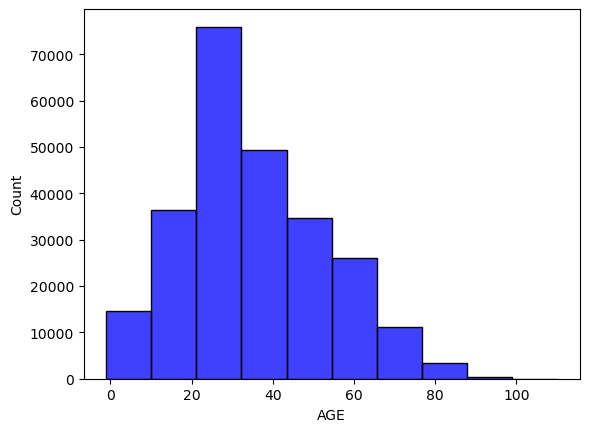

In [300]:
sns.histplot(master_df, x='AGE',bins = 10, kde=False, color='blue', edgecolor='black')

plt.show();

/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


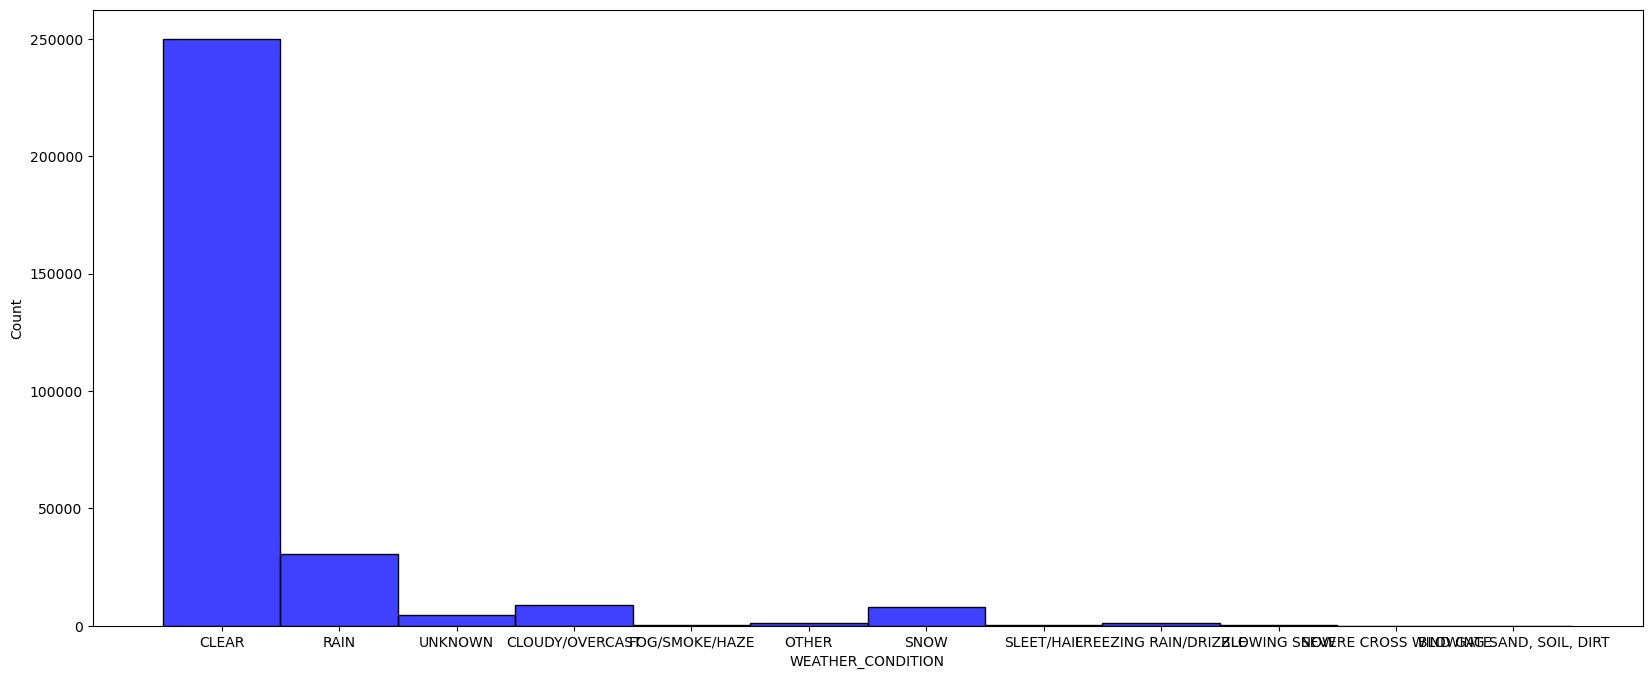

In [256]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.histplot(master_df, x='WEATHER_CONDITION', kde=False, color='blue', edgecolor='black')

plt.show();